## Model definition:

we have vector $y \in R^d$ and covariates matrix $X \in R^{nxd}$. The ith row of y and X corespond to the ith observation $(y_i, x_i)$.

In a Bayesian setting, we model this data as:

    - Likelihood:
$$y ∼ N(Xw,{\sigma}^2I)$$
    - Prior:
$$w ∼ N(0,\lambda^{-1}I)$$

We have:

$
p\left( {w|y,X} \right) = p\left( {y|w,X} \right)p\left( w \right)
$

$
\Leftrightarrow p\left( {w|y,X} \right) = \left( {\frac{1}{{\sigma \sqrt {2\pi } }}\exp \left( { - \frac{{{{\left( {y - Xw} \right)}^T}\left( {y - Xw} \right)}}{{2{\sigma ^2}}}} \right)} \right)\left( {{{\left( {\frac{\lambda }{{2\pi }}} \right)}^{\frac{d}{2}}}\exp \left( { - \frac{\lambda }{2}{w^T}w} \right)} \right)
$

$
\Rightarrow p\left( {w|y,X} \right) \propto \exp \left( { - \frac{{{{\left( {y - Xw} \right)}^T}\left( {y - Xw} \right)}}{{2{\sigma ^2}}}} \right)\exp \left( { - \frac{\lambda }{2}{w^T}w} \right)
$

$
\Rightarrow p\left( {w|y,X} \right) \propto \exp \left( { - \frac{{{{\left( {y - Xw} \right)}^T}\left( {y - Xw} \right)}}{{2{\sigma ^2}}} - \frac{\lambda }{2}{w^T}w} \right)
$

$
\Rightarrow p\left( {w|y,X} \right) \propto \exp \left( {\left( {\frac{{ - 1}}{2}} \right)\left( {{\sigma ^{-2}}{{\left( {y - Xw} \right)}^T}\left( {y - Xw} \right) + \lambda {w^T}w} \right)} \right)
$

$
\Rightarrow p\left( {w|y,X} \right) \propto \exp \left( {\left( {\frac{{ - 1}}{2}} \right)\left( {{\sigma ^{-2}}\left( {{y^T}y - {y^T}Xw - {X^T}{w^T}y + {X^T}{w^T}Xw} \right) + \lambda {w^T}w} \right)} \right)
$

$
\Rightarrow p\left( {w|y,X} \right) \propto \exp \left( {\left( {\frac{{ - 1}}{2}} \right)\left( {{\sigma ^{ - 2}}{y^T}y - {\sigma ^{ - 2}}{y^T}Xw - {\sigma ^{ - 2}}{X^T}{w^T}y + {\sigma ^{ - 2}}{w^T}{X^T}Xw + \lambda {w^T}w} \right)} \right)
$

$
\Rightarrow p\left( {w|y,X} \right) \propto \exp \left( {\left( {\frac{{ - 1}}{2}} \right)\left( {{w^T}\left( {\lambda I + {\sigma ^{ - 2}}{X^T}X} \right)w - {\sigma ^{ - 2}}{y^T}Xw - {\sigma ^{ - 2}}{X^T}{w^T}y} \right) + {\sigma ^{ - 2}}{y^T}y} \right)
$

$
\Rightarrow p\left( {w|y,X} \right) \propto \exp \left( {\left( {\frac{{ - 1}}{2}} \right)\left( {{w^T}\left( {\lambda I + {\sigma ^{ - 2}}{X^T}X} \right)w - {\sigma ^{ - 2}}{y^T}Xw - {\sigma ^{ - 2}}{X^T}{w^T}y} \right) + {\sigma ^{ - 2}}{y^T}y} \right)
$

$
\Rightarrow p\left( {w|y,X} \right) \propto \exp \left( {\left( {\frac{{ - 1}}{2}} \right)\left( {{w^T}\left( {\lambda I + {\sigma ^{ - 2}}{X^T}X} \right)w - {\sigma ^{ - 2}}{X^T}{w^T}y - {\sigma ^{ - 2}}{X^T}{w^T}y} \right)} \right)
$

$
\Rightarrow p\left( {w|y,X} \right) \propto \exp \left( {\left( {\frac{{ - 1}}{2}} \right)\left( {{w^T}\left( {\lambda I + {\sigma ^{ - 2}}{X^T}X} \right)w - 2{\sigma ^{ - 2}}{X^T}{w^T}y} \right)} \right)
$


We compare with Normal distribution

if $p\left( {w|y,X} \right) = N\left( {w|\mu ,\Sigma } \right)$, then :

$$\Sigma  = {\left( {\lambda I + {\sigma ^{ - 2}}{X^T}X} \right)^{ - 1}}$$

$$\mu  = {\text{ }}{(\lambda {\sigma ^2}I + X^TX)^{ - 1}}{X^T}y = {w_{MAP}}$$


## How to fit it:
    - Separate the the training data to 2 parts X = train[:,1:len(X[0])-1] and y = train[:,-1]
    - Create the identity matrix I
    - Choose the lambda
    - Find the variance of the y values
    - Find the weight of Lieaner Regression by the below formula:

$$\mu  = {\text{ }}{(\lambda {\sigma ^2}I + X^TX)^{ - 1}}{X^T}y = {w_{MAP}}$$

## How to use it:
    1. Slicing the testing data 
$$x_{new} = test[:,1:]$$
    2. Find the new data by the formula.
$${y_{new}} \approx {x_{new}}^T.{w_{MAP}}$$

In [18]:
import numpy as np

class BayesRegression:
	def __init__(self,lamda):
		self.lamda = lamda

	def fit(self, X, y):
		self.w = 0
		X_t = X.transpose()
		X_tX = np.matmul(X_t, X)
		id_mat = np.identity(len(X_tX))
		var = np.var(y)
		temp = (self.lamda*var*id_mat + X_tX).astype("Float32")
		invX_tX = np.linalg.inv(temp)
		self.w = np.matmul(np.matmul(invX_tX,X_t),y)

	def predict(self, x):
		y = np.matmul(x.transpose(), self.w)
		return y

# Line Regression

/home/parker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  del sys.path[0]


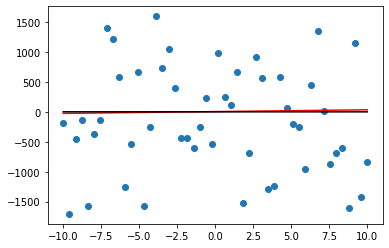

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

n = 50
a = 3
b = 4
x = np.linspace(-10, 10, n)
X = np.array([[1,i] for i in x ])
y = a* x + b + np.random.normal(0,1000,n)
classifier = BayesRegression(0.5)
classifier.fit(X,y)

plt.scatter(x,y)
plt.plot(x, a*x + b, color = 'r')
plt.plot(x,classifier.w[0]+classifier.w[1]*x,color = 'black')

# Parabola Regression

/home/parker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  del sys.path[0]


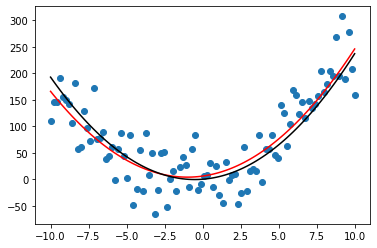

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

n = 100
a = 2
b = 4
c = 6
x = np.linspace(-10, 10, n)
X = np.array([[1 , i, i*i] for i in x])
y = a*x*x + b*x + c + np.random.normal(0,40,n)
classifier = BayesRegression(0.5)
classifier.fit(X,y)

plt.scatter(x,y)
plt.plot(x, a*x*x + b*x + c, color = 'r')
plt.plot(x,classifier.w[0]+classifier.w[1]*x+classifier.w[2]*x*x,color = 'black')

# Kaggle Regression

In [21]:
# Transform the training and testting data
import pandas as pd

df_train = pd.read_csv("../data/house-price/data/train.csv")
df_test = pd.read_csv("../data/house-price/data/test.csv")
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)
df_train = df_train.to_numpy()
df_test = df_test.to_numpy()
for i in range(1,len(df_train[0])-1):
    k = 1.0
    dic = {}
    
    #Transform the training data
    for j in range(len(df_train)):
        if df_train[:,i][j] == "None":
            df_train[:,i][j] = 0.0
            continue
        if type(df_train[:,i][j]) is str:
            if df_train[:,i][j] not in dic:
                dic[df_train[:,i][j]] = k
                k += 1
            df_train[:,i][j] = dic[df_train[:,i][j]]
            
    #Transform the testing data
    for j in range(len(df_test)):
        if type(df_test[:,i][j]) is str:
            if df_test[:,i][j] == "None":
                df_test[:,i][j] = 0.0
                continue
            df_test[:,i][j] = dic[df_test[:,i][j]]

In [22]:
classifier = BayesRegression(0)
train = df_train
X = train[:,1:len(train[0])-1]
y = train[:,-1]
X = np.insert(X, 0, 1, axis=1)
classifier.fit(X,y)

f = open("../data/house-price/outputs/submission_bayesian-linear-regression.csv", "w")
f.write("Id,SalePrice\n" )
test = np.insert(df_test, 1, 1, axis=1)
for i in range(len(test)):
    a = classifier.predict(test[i][1:])
    f.write(str(test[i][0]) + "," + str(round(a, 1)) +"\n")
f.close()

/home/parker/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  del sys.path[0]
